In [12]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)





In [13]:
shoppers_data<-read_csv("online_shoppers_intention.csv")
shoppers_data

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [14]:
shoppers_data_select<-select(shoppers_data,c(Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue))
shoppers_data_1tidy<-pivot_longer(shoppers_data_select,cols=c(Administrative,Informational,ProductRelated),names_to="Task_type",values_to="No._of_tasks")
shoppers_data_2tidy<-pivot_longer(shoppers_data_1tidy,cols=c(Administrative_Duration,Informational_Duration,ProductRelated_Duration),names_to="Duration_type",values_to="Time_spent")
shoppers_data_tidy<-shoppers_data_2tidy%>%filter(No._of_tasks!=0&Time_spent!=0)
shoppers_data_tidy

Revenue,Task_type,No._of_tasks,Duration_type,Time_spent
<lgl>,<chr>,<dbl>,<chr>,<dbl>
FALSE,ProductRelated,2,ProductRelated_Duration,64.000000
FALSE,ProductRelated,2,ProductRelated_Duration,2.666667
FALSE,ProductRelated,10,ProductRelated_Duration,627.500000
⋮,⋮,⋮,⋮,⋮
FALSE,ProductRelated,15,Administrative_Duration,75.00
FALSE,ProductRelated,15,ProductRelated_Duration,346.00
FALSE,ProductRelated,3,ProductRelated_Duration,21.25


In [25]:
set.seed(101) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data  
shoppers_split <- initial_split(shoppers_data_tidy, prop = 0.75, strata = Revenue)  
shoppers_train <- training(shoppers_split)   
shoppers_test <- testing(shoppers_split)
shoppers_train
shoppers_test

Revenue,Task_type,No._of_tasks,Duration_type,Time_spent
<lgl>,<chr>,<dbl>,<chr>,<dbl>
FALSE,ProductRelated,2,ProductRelated_Duration,2.666667
FALSE,ProductRelated,10,ProductRelated_Duration,627.500000
FALSE,ProductRelated,19,ProductRelated_Duration,154.216667
⋮,⋮,⋮,⋮,⋮
FALSE,ProductRelated,15,Administrative_Duration,75.00
FALSE,ProductRelated,15,ProductRelated_Duration,346.00
FALSE,ProductRelated,3,ProductRelated_Duration,21.25


Revenue,Task_type,No._of_tasks,Duration_type,Time_spent
<lgl>,<chr>,<dbl>,<chr>,<dbl>
FALSE,ProductRelated,2,ProductRelated_Duration,64.0000
FALSE,ProductRelated,20,ProductRelated_Duration,2981.1667
FALSE,ProductRelated,8,ProductRelated_Duration,136.1667
⋮,⋮,⋮,⋮,⋮
FALSE,Administrative,6,ProductRelated_Duration,1075.250
FALSE,ProductRelated,44,ProductRelated_Duration,1157.976
FALSE,ProductRelated,5,ProductRelated_Duration,465.750


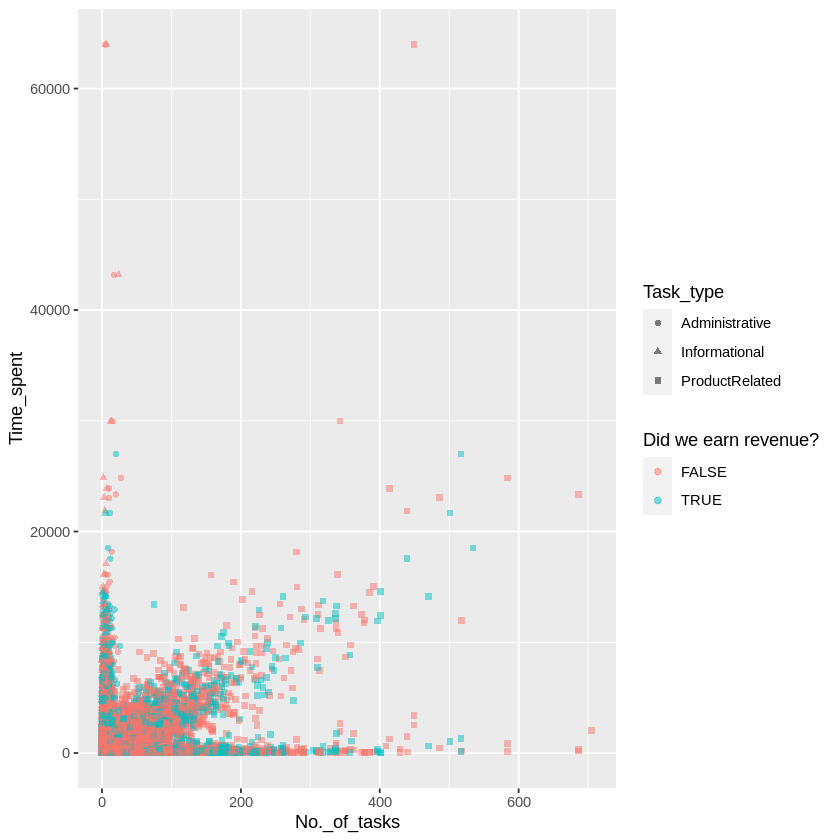

In [26]:
shoppers_plot <- shoppers_train %>%
  ggplot(aes(x = No._of_tasks, y = Time_spent, color = Revenue ,shape=Task_type)) +
  geom_point(alpha = 0.5) +
  labs(color = "Did we earn revenue?") 
shoppers_plot